In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install netCDF4
!pip install apexpy
!pip install --no-binary shapely shapely --force
!pip install cartopy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.4.tar.gz (199 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.4-cp37-cp37m-linux_x86_64.whl size=669461 sha256=de0844eb8c524ae1e6cd43b998e4b8b72636656e1352cc926535f300e8359866
  Stored in directory: /root/.cache/pip/wheels/0b/f0/55/139a0ab07fbf91378f9b7062842aee4d4bb3566a1fc30ac7a4
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.4
    Uninstalling Shapely-1.8.4:
      Successfully uninstalled Shapely-1.8.4
Looking in indexes: https://pypi.or

In [3]:
import numpy as np
import matplotlib
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
import bisect
import netCDF4
import pandas as pd
import seaborn as sns
import pylab
import os
import glob
from ftplib import FTP
import fnmatch
import matplotlib.dates as mdates
from netCDF4 import Dataset
import warnings
from apexpy import Apex
'''Optional: Specify the plotting style '''
# plt.style.use('seaborn')
# plt.rcParams.update({'font.size': 15,\
#                      'xtick.labelsize' : 15,\
#                      'ytick.labelsize' : 15,\
#                      'axes.titlesize' : 16,\
#                      'axes.labelsize' : 16,\
#                      'date.autoformatter.minute': '%H:%M' })
# plt.style.use('seaborn')
# plt.rcParams.update({'axes.titlesize' : 16,
#                      'axes.labelsize' : 16 })
plt.rcParams.update({
    "font.size": 15,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

In [4]:
import sklearn

In [5]:
sklearn.__version__

'1.0.2'

In [6]:
import apexpy
apexpy.__version__

'1.1.0'

In [7]:
def AccessFiles(a):
    temp = Dataset('/content/drive/MyDrive/GOLD_DATA/data' + a,'r')
    lo = temp.variables['longitude'][:]
    la = temp.variables['latitude'][:]
    oi_radiance = temp.variables['radiance_oi_1356'][:]
    n2_radiance = temp.variables['radiance_n2_lbh'][:]
    on2 = temp.variables['on2'][:]
    sza = temp.variables['solar_zenith_angle'][:]
    a = [temp['scan_start_time'][i,:][:] for i in range(temp['scan_start_time'].shape[0])]
    b = [temp['scan_stop_time'][i,:][:] for i in range(temp['scan_stop_time'].shape[0])]
    start_time = []
    stop_time = []
    a = np.array(a)
    b = np.array(b)
    for i in range(temp['scan_start_time'].shape[0]):
        c = ""
        d = ""
        for j in range(50):
            c += a[i,j].decode('UTF-8')
            d += b[i,j].decode('UTF-8')
        start_time.append(c)
        stop_time.append(d)
    return lo,la,n2_radiance,oi_radiance,on2,sza,start_time,stop_time

In [8]:
path_2018 = '/content/drive/MyDrive/GOLD_DATA/data/2018'
path_2019 = '/content/drive/MyDrive/GOLD_DATA/data/2019'
path_2020 = '/content/drive/MyDrive/GOLD_DATA/data/2020'
path_2021 = '/content/drive/MyDrive/GOLD_DATA/data/2021'



files_2018 = os.listdir(path_2018)
files_2019 = os.listdir(path_2019)
files_2020 = os.listdir(path_2020)
files_2021 = os.listdir(path_2021)


#2018
file_list_2018 = [[[],1,31,'January'], [[],32,59,'February'], [[],60,90,'March'], [[],91,120,'April'], [[],121,151,'May'], [[],152,181,'June'],
             [[],182,212,'July'], [[],213,243,'August'], [[],244,273,'September'], [[],274,304,'October'], [[],305,334,'November'], 
             [[],335,365,'December']]


#2019
file_list_2019 = [[[],1,31,'January'], [[],32,59,'February'], [[],60,90,'March'], [[],91,120,'April'], [[],121,151,'May'], [[],152,181,'June'],
             [[],182,212,'July'], [[],213,243,'August'], [[],244,273,'September'], [[],274,304,'October'], [[],305,334,'November'], 
             [[],335,365,'December']]

#2020
file_list_2020 = [[[],1,31,'January'], [[],32,60,'February'], [[],61,91,'March'], [[],92,121,'April'], [[],122,152,'May'], [[],153,182,'June'],
             [[],183,213,'July'], [[],214,244,'August'], [[],245,274,'September'], [[],275,305,'October'], [[],306,335,'November'], 
             [[],336,366,'December']]

#2021
file_list_2021 = [[[],1,31,'January'], [[],32,59,'February'], [[],60,90,'March'], [[],91,120,'April'], [[],121,151,'May'], [[],152,181,'June'],
             [[],182,212,'July'], [[],213,243,'August'], [[],244,273,'September'], [[],274,304,'October'], [[],305,334,'November'], 
             [[],335,365,'December']]

master_file_list = [[files_2018, file_list_2018], [files_2019, file_list_2019], 
                    [files_2020, file_list_2020], [files_2021,file_list_2021]]

for files,file_list in master_file_list: 
    a = []
    total_month = 1 
    month = 0
    for f in files:
        a.append(f)
    a.sort()
    for f in a:
        if f != '.DS_Store':
          b = int(f[17:20])
          if (b <= file_list[month][2]) and (b >= file_list[month][1]):
              file_list[month][0].append(f)
              total_month += 1
          else:
              while(not (b <= file_list[month][2] and b >= file_list[month][1])):
                  total_month = 1
                  month += 1
              file_list[month][0].append(f)


 

In [9]:
def correct_file_list(desired_time_period, dates_to_be_removed):
    beg_year, beg_day, fin_year, fin_day = desired_time_period
    master_list_post_init = beg_year - 2018
    master_list_post_fin = fin_year - 2018
    
    final_list = []
    check_one = 0
    check_two = 0
    counter = master_list_post_init
    l = master_file_list[master_list_post_init: master_list_post_fin + 1 ]
    exit = 0
    for _,file_list in l:
        if not exit:
            for data, day_one, day_last, name in file_list:
                if (check_one == 0 and beg_day <= day_last and beg_day >= day_one
                    and counter <= master_list_post_fin and exit == 0):
                    check_one = 1
        
                if (check_one == 1 and counter <= master_list_post_fin and exit == 0):
                
                    for file_name in data:
                        day = int(file_name[17:20])
                        if check_two == 0 and day == beg_day:
                            check_two = 1
                        
                        if ((counter + 2018,day) in dates_to_be_removed and exit == 0
                            and check_two == 1 and day == fin_day and counter == master_list_post_fin):
                            exit = 1
                        
                        if ((counter + 2018,day) not in dates_to_be_removed and exit == 0
                            and check_two == 1):
                            if (day == fin_day and counter == master_list_post_fin):
                                final_list.append(file_name)
                                exit = 1
                            else:
                                final_list.append(file_name)
        else:
            break
        counter += 1
    return final_list

In [10]:
def make_time_dataframe(choice, on2, oi, n2, sza, day, scan, lon, lat):
    if (choice == 'ON2'):
        choice_data = on2[scan,:,:]
        data = np.array([lon,lat,choice_data]).reshape(3,-1).T
        df = pd.DataFrame(data=data, columns=["lon", "lat",choice])
        df.insert(3, 'day', day)
        df_final = df.dropna()
        return df_final
    elif (choice == 'OI'):
        choice_data = oi[scan,:,:]
        data = np.array([lon,lat,choice_data]).reshape(3,-1).T
        df = pd.DataFrame(data=data, columns=["lon", "lat",choice])
        df.insert(3, 'day', day)
        df_final = df.dropna()
        return df_final
    elif (choice == 'N2'):
        choice_data = n2[scan,:,:]
        data = np.array([lon,lat,choice_data]).reshape(3,-1).T
        df = pd.DataFrame(data=data, columns=["lon", "lat",choice])
        df.insert(3, 'day', day)
        df_final = df.dropna()
    elif (choice == 'SOLAR_ZENITH_ANGLE'):
        choice_data = sza[scan,:,:]
        data = np.array([lon,lat,choice_data]).reshape(3,-1).T
        df = pd.DataFrame(data=data, columns=["lon", "lat",choice])
        df.insert(3, 'day', day)
        df_final = df.dropna()

        return df_final


In [11]:


def pvt_processing(storm_df, choice):
    storm_df = storm_df.dropna(axis = 1)
    storm_df = storm_df.sort_values(by = ["lon","lat"])
    storm_pvt = storm_df.pivot_table(index = "day", columns = ["lon","lat"], values = choice)
    storm_pvt = storm_pvt.dropna(axis = 1)
    return storm_pvt

def find_mean_vector(storm_pvt):
    means = []
    for column in storm_pvt:
        means.append(storm_pvt[column].mean())

    mean_vector = storm_pvt.copy()
    mean_vector.drop(mean_vector.tail(storm_pvt.shape[0]-1).index,inplace=True) # drop last n rows
    mean_vector[:] = np.matrix(means)
    return mean_vector





In [12]:

import pywt

from scipy import signal

def wavelet_analysis(weights, title):
    data_norm = normalize(weights)
    dt = 1
    pad = 1
    dj = 0.2
    s0 = 2*dt
    j1 = 6/dj
    lag1 = 0.5
    param = 6
    mother = 'Morlet'
    dtmin = 0.25/8    # dt/n of suboctaves
    time = list(range(len(weights)))
    result = cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='x')
    wavelet_plot('Wavelet Analysis ' + title,time, data_norm, dtmin, result, title)



def power_spectrum(weights,title,dt = 1):
    dt = 1
    n = len(weights)
    
    f = np.array(weights)
    fhat = np.fft.fft(f,n)
    PSD = fhat * np.conj(fhat) / n
    freq = (1/(dt * n)) * np.arange(n)
    L = np.arange(1, np.floor(n/2),dtype = 'int')
    
    
    
    plt.plot(np.reciprocal(freq[L]),PSD[L],color = 'c', LineWidth = 2)
    plt.xlim(np.reciprocal(freq[L[0]]),np.reciprocal(freq[L[-1]]))
    plt.ylabel("Power Spectrum Density")
    plt.xlabel("Period (days)")   
    
    for i_x, i_y in zip(np.reciprocal(freq[L]),PSD[L]):
        plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
    plt.show()
    
    
def weight_v_time_plot(weights, pc_no, days, main_folder, sub_folder, title, it, save_path, save = 0):
    fig,ax = plt.subplots(1, 1, figsize=(30,5))
    ax.plot(days,weights, color = 'g',linestyle='dashed', marker='o',
     markerfacecolor='blue')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
    plt.xlabel("Day", fontsize = 15)
    plt.xticks(days)
    plt.ylabel("Weight")
    plt.title(title, fontsize=20)
    #save = 1
    #plt.savefig('/Users/divyamgoel/Desktop/research/On2spec/Stormdata/Stormpics/sos/miter/WeightsAGU' + str(pc_no + 1) + '.jpg', dpi = 300, bbox_inches = 'tight')
    if save:
        #save_path = '/Users/divyamgoel/Desktop/research/On2spec/Stormdata/Stormpics/sos/miter/'+main_folder+'/'+sub_folder + str(pc_no+1)+'/'
        if not os.path.exists(save_path):
            os.makedirs(save_path)
            
        save_path +=  title + '.jpg'
        plt.savefig(save_path, dpi = 300, bbox_inches='tight')
    plt.show()
    
    
    # power_spectrum(weights, title,dt = 1)
    # wavelet_analysis(weights, title)




In [13]:
from scipy.interpolate import griddata
    
def pca_scatter_plotter(data, choice, pca,pc_no, main_folder,sub_folder,title,it,save_path, ma = 0.1,mi= -0.1,dif = 0.1,cmap = 'seismic',save = 0):
    #fig, (ax) = plt.subplots(nrows=1,ncols=5,figsize=(15,15), subplot_kw={'projection': ccrs.PlateCarree()})
    fig, axis = plt.subplots(1, 1, figsize=(5,5), subplot_kw={'projection': ccrs.PlateCarree()})

    A = Apex(date=2020.4)

    lon_points = []
    lat_points = []
    for i in range(-60,125,10):
        height = 80
        mlat = 30
        glat, glon = A.convert(mlat,i,'apex','geo',height = height)
        lon_points.append(glon)
        lat_points.append(glat)
        mlat = -30
        glat, glon = A.convert(mlat,i,'apex','geo',height = height)
        lon_points.append(glon)
        lat_points.append(glat)
#         mlat = 10
#         glat, glon = A.convert(mlat,i,'apex','geo',height = height)
#         lon_points.append(glon)
#         lat_points.append(glat)
#         mlat = -10
#         glat, glon = A.convert(mlat,i,'apex','geo',height = height)
#         lon_points.append(glon)
#         lat_points.append(glat)
    
    
    # d = data[data['pca'] == pc_no]
    axis.coastlines()
    norm = plt.Normalize(mi,ma)
    # plot = axis.scatter(d["lon"],d["lat"], c = d[choice],norm = norm,cmap = cmap)
    x = np.arange(data[data['pca'] == pc_no]['lon'].min(), data[data['pca'] == pc_no]['lon'].max(), 0.5)
    y = np.arange(data[data['pca'] == pc_no]['lat'].min(), data[data['pca'] == pc_no]['lat'].max(), 0.5)
    x_, y_ = np.meshgrid(x, y)
    vals = griddata(data[data['pca'] == pc_no][['lon','lat']],
            data[data['pca'] == pc_no]['ON2'], 
            (x_, y_), method = 'cubic')
    plot = axis.pcolormesh(x_,y_,vals, cmap = 'seismic', norm = norm)#, value = 'ON2')
    # cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
    latitude_formatter = LatitudeFormatter(direction_label = False)
    longitude_formatter = LongitudeFormatter(direction_label = False)
    gl = axis.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30), xformatter=longitude_formatter, yformatter=latitude_formatter,crs=ccrs.PlateCarree(),color = 'grey')
    gl.xlocator = mticker.FixedLocator([i for i in range(-90,30,30)])

    plot2 = axis.scatter(lon_points,lat_points, marker = '_',color = 'k' , linewidths=2)#,norm = norm,cmap = cmap)
    # axis.set_xticks([-120, -90, -60, -30, 0], crs=ccrs.PlateCarree())
    # axis.set_yticks([-72, -54, -36, -18, 0, 18, 36, 54, 72], crs=ccrs.PlateCarree())
    plt.title(title, pad=27)
    # gl.bottom_labels=False
    # gl.top_labels=False
    # gl.left_labels=False
    # gl.right_labels=False

    text_fin = str("{0:.2f}".format(pca.explained_variance_ratio_[pc_no]))
    axis.text(-130, -110, 'explained variance ratio: ' + 
              text_fin, style='italic')
#     axis.text(-140, -120, 'explained variance: ' + 
#               str(pca.explained_variance_[pc_no]), style='italic')
#     axis.text(-140, -130, 'singular Value: ' + 
#               str(pca.singular_values_[pc_no]), style='italic')
    axis.set_extent([-130, 30, -80, 80], crs=ccrs.PlateCarree())
    # lon_formatter = LongitudeFormatter(direction_label=True)
    # lat_formatter = LatitudeFormatter(direction_label=True)
    # axis.xaxis.set_major_formatter(lon_formatter)
    # axis.yaxis.set_major_formatter(lat_formatter)
    fmt = lambda x: "{:.2f}%".format(x)
    
#     cbaxes = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 
#     cb = plt.colorbar(ax1, cax = cbaxes)
    x = -0.1
    vals = [-0.1,-0.09,-0.08,-0.07,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,
           0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
    cbar = fig.colorbar(plot, ticks=vals, orientation='vertical', pad = 0.15)
    cbar.ax.set_yticklabels(vals) 
    

#     cbar.set_ticks(vals)          #Second appraoch, assumed ticks and tick labels should be same
#     cbar.set_ticklabels(vals)     #from the above mentioned stackoverflow question, but did't work
    # plt.savefig('/Users/divyamgoel/Desktop/research/On2spec/Stormdata/Stormpics/sos/miter/AGU' + str(pc_no + 1) + '.jpg')
    # if save == 1:
    #     save_path1 = '/Users/divyamgoel/Desktop/research/On2spec/Stormdata/Stormpics/sos/miter/'+main_folder+'/'
    #     save_path2 = save_path1 + sub_folder + str(pc_no+1)+'/'
    #     if not os.path.exists(save_path2):
    #         os.makedirs(save_path2)
    #     save_path2 += title + '.jpg'
    #     plt.savefig(save_path2, dpi = 300, bbox_inches='tight')
    #     print('saved')
    plt.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'EOF{}'.format(pc_no) + '.jpeg', dpi = 300, bbox_inches = 'tight')
    plt.show()

In [14]:
def exclude(row):
    A = Apex(date=2020.4)
    height = 80
    glat = row['lat']
    glon = row['lon']
    mlat, mlon = A.convert(glat, glon, 'geo','apex', height=height)
    if mlat <= 30 and mlat >= -30:
        return False
    return True

In [15]:

def center_mean(pvt_vector):
    mean_pvt_vector = find_mean_vector(pvt_vector)
    n = np.array(mean_pvt_vector[mean_pvt_vector.index == mean_pvt_vector.index[0]])
    temp = list(pvt_vector.index)
    new_pvt = pvt_vector.copy()
    for i in temp:
        new_pvt[new_pvt.index == i] = pvt_vector[pvt_vector.index == i]-n

    return new_pvt

In [16]:

def un_pvt_processing(df, choice):
    df = pd.melt(df.reset_index(), id_vars='day')
    df = df.rename(columns = {"value":choice})
    return df

In [17]:
def complete_normal_PCA(storm_df, req,it,main_folder,sub_folder,title = '',show_weights = False,choice = 'ON2',save = 0):
    
    
    storm_pvt_df = pvt_processing(storm_df, choice)
    scaler = StandardScaler()
    Xt = scaler.fit_transform(storm_pvt_df)


    pca2 = PCA(n_components = 0.95)
    f2 = pca2.fit_transform(Xt)
    EOFs2 = pca2.components_
    shape2 = f2.shape[0]-f2.shape[1]
    eigen_vector_df2 = pd.DataFrame(EOFs2, columns = storm_pvt_df.columns)
    eigen_vector_df2.index.names = ['pca']

    alpha = pd.melt(eigen_vector_df2.reset_index(), id_vars='pca')
    alpha = alpha.rename(columns = {"value":choice})
    l = len(alpha['pca'].unique().tolist())
    
    days = list(storm_pvt_df.index)
    mean_vector = find_mean_vector(storm_pvt_df)
    i = req
    weights_array = np.zeros((6,55))
    weights_df = pd.DataFrame(weights_array, columns = range(81,136))
    for i in range(6):
        pca_scatter_plotter(alpha[alpha['pca'] == i], 
                   'ON2',pca2,i,main_folder,sub_folder,title + 'PC '+ str(i+1),it,'',-0.1,0.1,0.01,'seismic',save)
        counter = 0
        weights = np.zeros(len(days))
        for day in days:
            day_df = storm_pvt_df[storm_pvt_df.index == day]
            temp_mean = mean_vector.values#np.array(mean_vector[mean_vector.index == 0])
            diff_df = day_df - temp_mean
            weights[counter] = np.dot(diff_df,eigen_vector_df2[eigen_vector_df2.index == i].T)
            counter += 1
            
        weights_df.iloc[i,:] = weights
        weight_v_time_plot(weights, i,[day for day in days],main_folder,sub_folder,"Weights for "+ title + 'PCA ' + str(i+1), it,"",save)
            
    return alpha, weights_df

<h1>April<h1>

In [18]:
year_init = 2020
year_fin = 2020
day_init = 81
day_fin = 135
buffer = 0
april_required = correct_file_list((year_init,day_init, 
                                    year_fin,day_fin),[()])

choices = ["ON2", "OI", "N2"]
save = 0
#for choice in choices:
choice = choices[0]
# choice = 'SOLAR_ZENITH_ANGLE'
file_extension = '/' + april_required[0][12:16] + '/'
lo,la,n2,oi,on2,sza,start_time,stop_time = AccessFiles(file_extension+april_required[0])


scan_min = 33
scan_max = 39
storm_df = make_time_dataframe(choice,on2,oi,n2,sza,day_init-buffer,scan_min,lo,la)
for i in range(scan_min + 1,scan_max):
    temp_df = make_time_dataframe(choice,on2,oi,n2,sza,day_init-buffer,i,lo,la)
    storm_df = storm_df.append(temp_df, ignore_index=True)

for index in range(1,len(april_required)):
    file_extension = '/' + april_required[index][12:16] + '/'
    day = int(april_required[index][17:20]) #- day_init

    lo,la,n2,oi,on2,sza,start_time,stop_time = AccessFiles(file_extension+april_required[index])

    temp_df1 = make_time_dataframe(choice,on2,oi,n2,sza,day,scan_min,lo,la)

    storm_df = storm_df.append(temp_df1, ignore_index=True)
    for scan in range(scan_min + 1,scan_max):
        temp_df2 = make_time_dataframe(choice,on2,oi,n2,sza,day,scan,lo,la)
        storm_df = storm_df.append(temp_df2, ignore_index=True)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


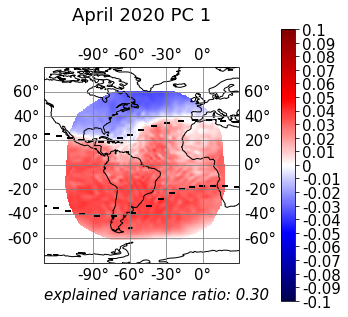

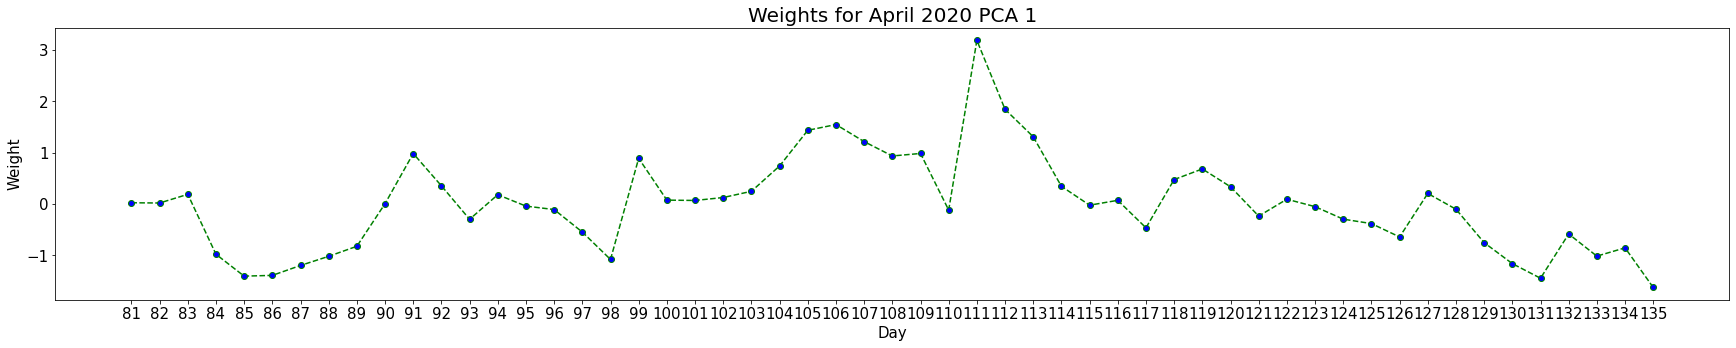

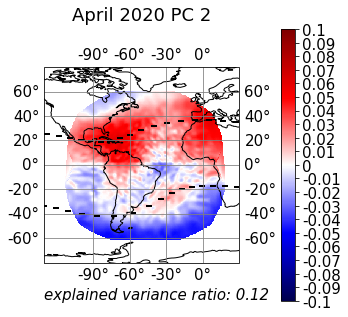

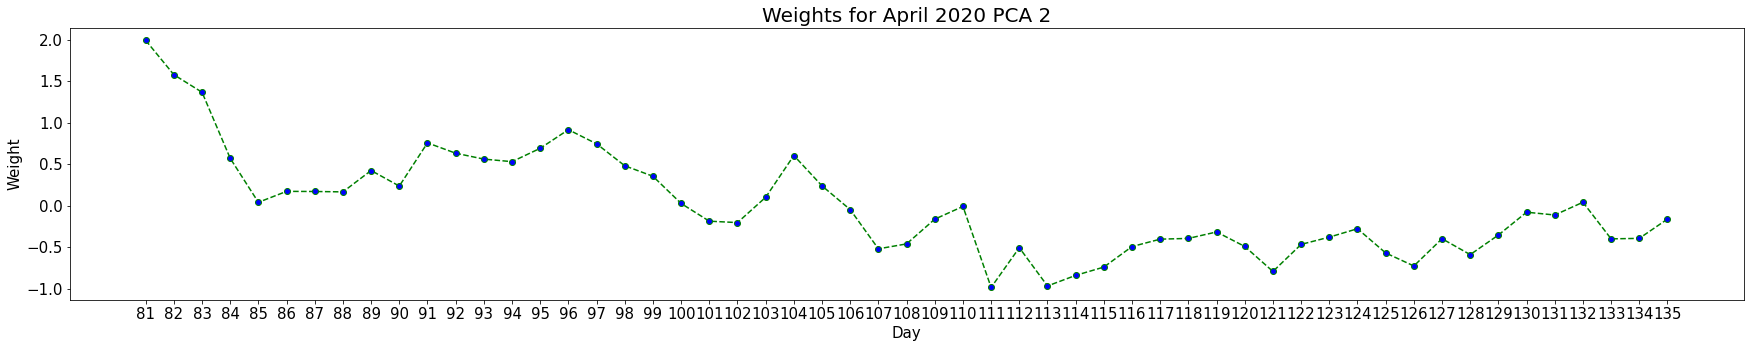

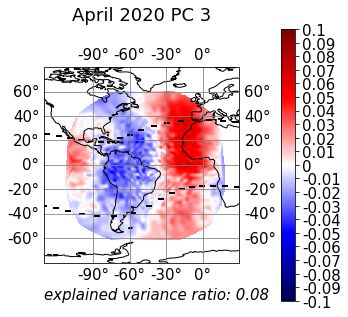

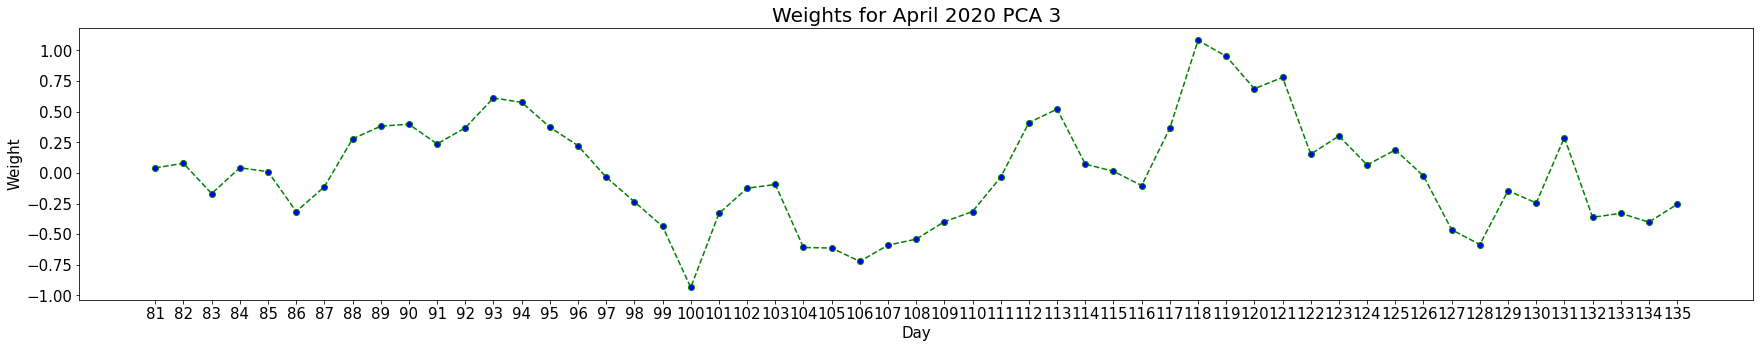

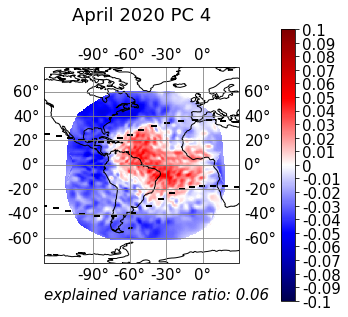

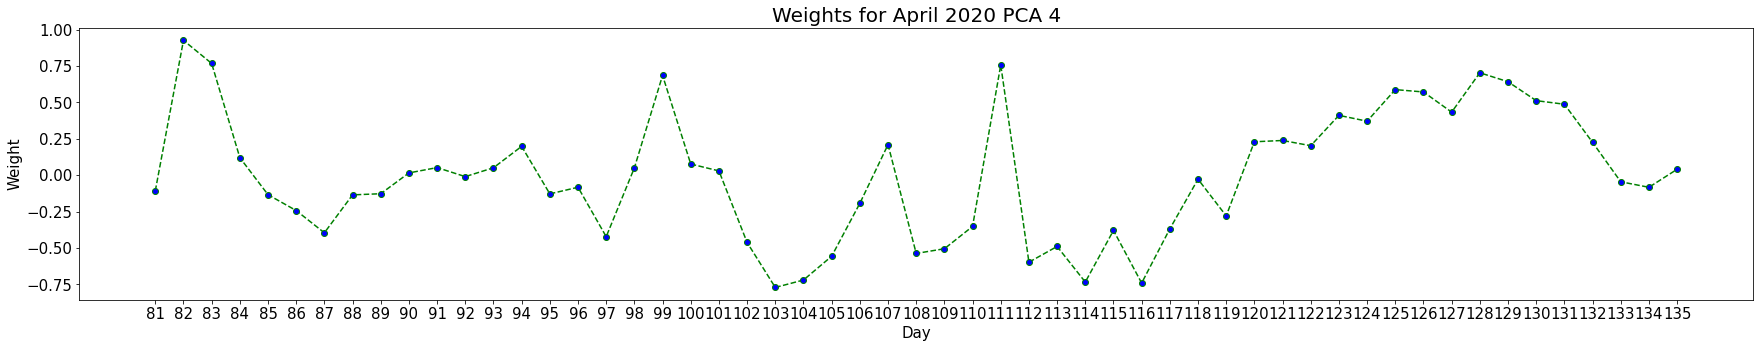

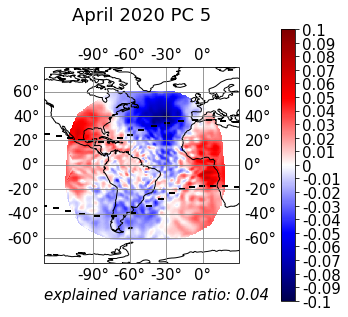

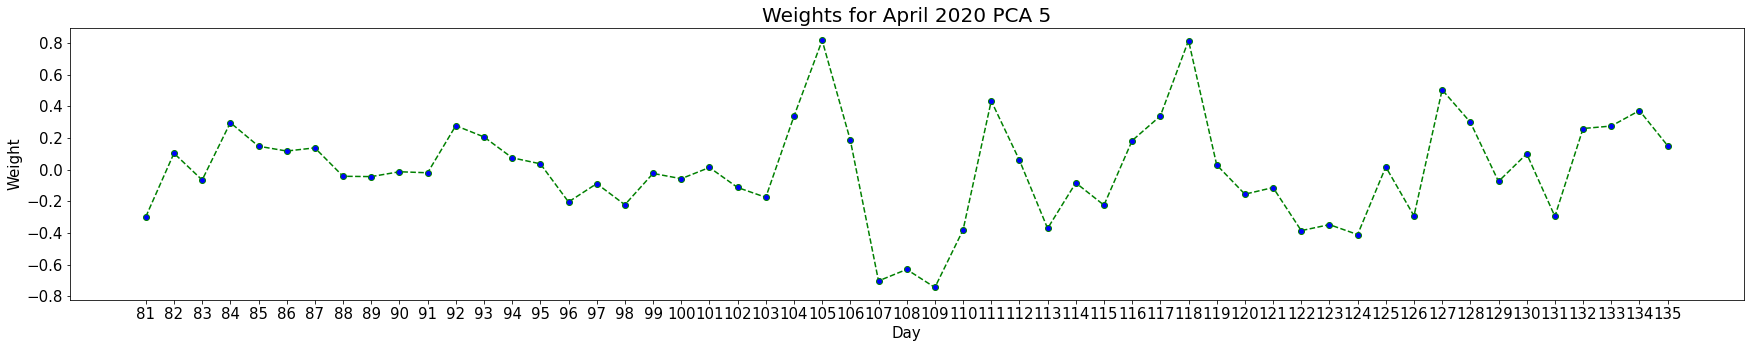

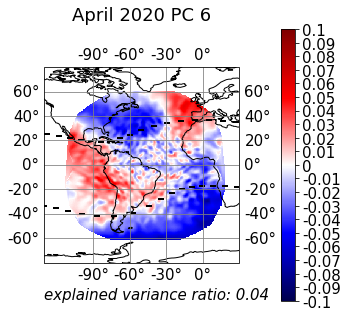

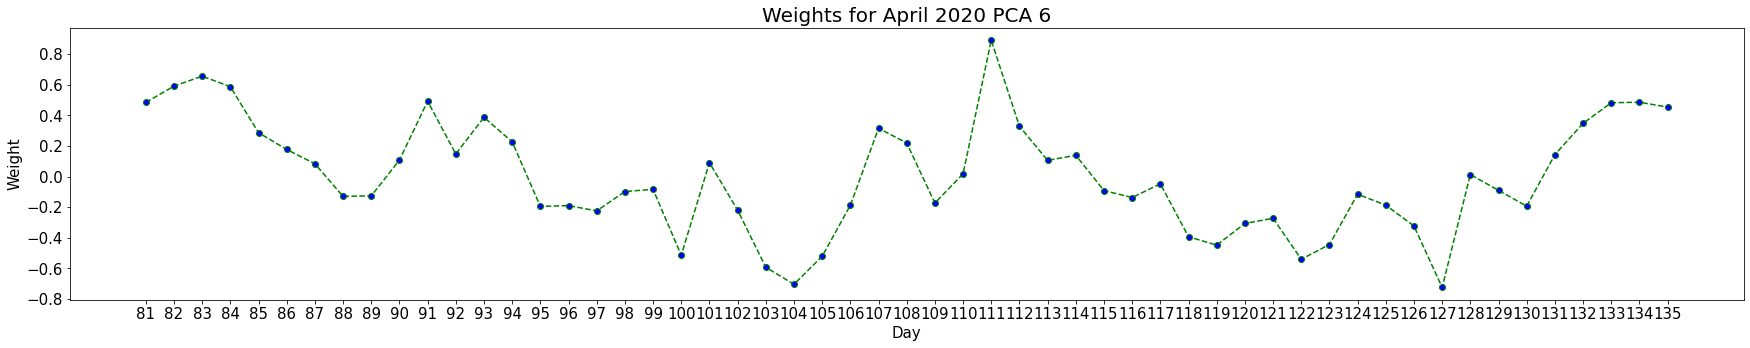

In [19]:
rv,ww = complete_normal_PCA(storm_df,0, main_folder = '', sub_folder = '', it = 0,title = 'April 2020 ', show_weights = True)


In [20]:
t = rv[rv['pca'] == 0].pivot_table(columns = 'lon', index = 'lat', values = 'ON2')

In [21]:
xx, yy = np.meshgrid(rv[rv['pca'] == 0]['lon'],rv[rv['pca'] == 0]['lat'])

In [22]:
xx.shape, yy.shape

((1432, 1432), (1432, 1432))

In [23]:
t.shape

(716, 976)

In [24]:
x = np.arange(rv[rv['pca'] == 0]['lon'].min(), rv[rv['pca'] == 0]['lon'].max(), 0.5)
y = np.arange(rv[rv['pca'] == 0]['lat'].min(), rv[rv['pca'] == 0]['lat'].max(), 0.5)

In [25]:
x_, y_ = np.meshgrid(x, y)

In [26]:
from scipy.interpolate import griddata

In [27]:
ww.to_csv('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'weights_time_series' + '.csv')

In [28]:
storm_df

,lon,lat,ON2,day
0,-57.236362,-67.580780,0.664947,81
1,-50.697132,-67.385765,0.699005,81
2,-44.302868,-67.385765,0.683511,81
3,-37.763638,-67.580780,0.657175,81
4,-83.201630,-61.649231,0.765341,81
...,...,...,...,...
249374,-45.154633,59.472775,0.703612,135
249375,-40.424820,59.553856,0.762669,135
249376,-35.571564,59.720547,0.763798,135
249377,-30.491703,59.983074,0.766174,135


In [29]:
mean_pvt = (pvt_processing(storm_df, choice = 'ON2').mean())

In [30]:
mean_pvt

lon          lat       
-113.124603  -16.257717    0.991545
-110.815552  -13.608164    0.994429
              13.608169    0.888414
-110.006157   21.333946    0.837380
-110.006149  -21.333939    0.976022
                             ...   
 15.006152   -21.333939    0.795216
 15.006158    21.333946    0.728768
 15.815552   -13.608164    0.854230
 15.815555    13.608169    0.763074
 18.124607   -16.257717    0.819345
Length: 1432, dtype: float32

In [31]:
mean_df = mean_pvt.reset_index().rename(columns = {0:'ON2'})
mean_df

,lon,lat,ON2
0,-113.124603,-16.257717,0.991545
1,-110.815552,-13.608164,0.994429
2,-110.815552,13.608169,0.888414
3,-110.006157,21.333946,0.837380
4,-110.006149,-21.333939,0.976022
...,...,...,...
1427,15.006152,-21.333939,0.795216
1428,15.006158,21.333946,0.728768
1429,15.815552,-13.608164,0.854230
1430,15.815555,13.608169,0.763074


In [32]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


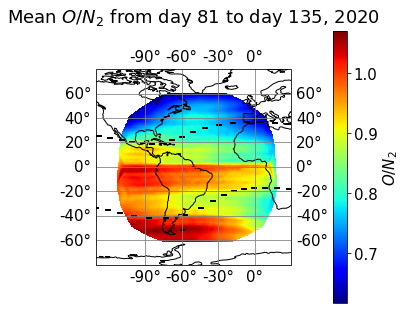

In [33]:
fig, axis = plt.subplots(1, 1, figsize=(5,5), subplot_kw={'projection': ccrs.PlateCarree()})

A = Apex(date=2020.4)

lon_points = []
lat_points = []
for i in range(-60,125,10):
    height = 80
    mlat = 30
    glat, glon = A.convert(mlat,i,'apex','geo',height = height)
    lon_points.append(glon)
    lat_points.append(glat)
    mlat = -30
    glat, glon = A.convert(mlat,i,'apex','geo',height = height)
    lon_points.append(glon)
    lat_points.append(glat)

x = np.arange(mean_df["lon"].min(), mean_df["lon"].max(), 0.5)
y = np.arange(mean_df["lat"].min(), mean_df["lat"].max(), 0.5)
x_, y_ = np.meshgrid(x, y)
vals = griddata(mean_df[['lon','lat']],
        mean_df['ON2'], 
        (x_, y_), method = 'cubic')
plot = axis.pcolormesh(x_,y_,vals, cmap = 'jet')
t = {"east": "", "west": "", "north": "", "south": ""}
latitude_formatter = LatitudeFormatter(direction_label = False)
longitude_formatter = LongitudeFormatter(direction_label = False)
gl = axis.gridlines(draw_labels=True, 
                    xlocs=np.arange(-180,180,30), 
                    xformatter=longitude_formatter, 
                    yformatter=latitude_formatter,
                    crs=ccrs.PlateCarree(), 
                    color = 'grey')    
gl.xlocator = mticker.FixedLocator([i for i in range(-90,30,30)])
plot2 = axis.scatter(lon_points,lat_points, marker = '_',color = 'k' , linewidths=2)
plt.title('Mean $O/N_{2}$ from day 81 to day 135, 2020', pad=27)
axis.coastlines()
axis.set_extent([-130, 30, -80, 80], crs=ccrs.PlateCarree())
fmt = lambda x: "{:.2f}%".format(x)
x = -0.1
cbar = fig.colorbar(plot, orientation='vertical', pad = 0.15)
cbar.set_label('$O/N_{2}$')
plt.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'mean_data' + '.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

In [34]:
storm_pvt_df = pvt_processing(storm_df, 'ON2')
scaler = StandardScaler()
Xt = scaler.fit_transform(storm_pvt_df)
pca = PCA(n_components = 0.95)
f2 = pca.fit_transform(Xt)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


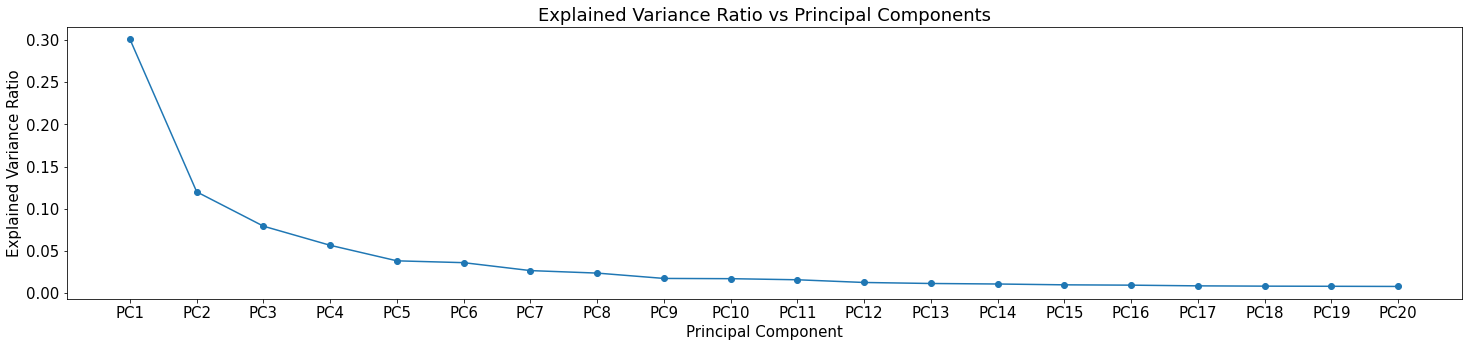

In [35]:
plt.figure(figsize=(25,5))
plt.scatter(['PC{}'.format(i) for i in range(1,21)],[pca.explained_variance_ratio_[i] for i in range(20)])
plt.plot(['PC{}'.format(i) for i in range(1,21)],[pca.explained_variance_ratio_[i] for i in range(20)])
plt.xticks(['PC{}'.format(i) for i in range(1,21)])
plt.title('Explained Variance Ratio vs Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'explaine_var_vs_pc' + '.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

In [39]:
ww

,81,82,83,84,85,86,87,88,89,90,...,126,127,128,129,130,131,132,133,134,135
0,0.025260,0.020484,0.189489,-0.978299,-1.404730,-1.390270,-1.196812,-1.018466,-0.822817,0.007982,...,-0.640932,0.206819,-0.100577,-0.751996,-1.160730,-1.445690,-0.583301,-1.014796,-0.853497,-1.625207
1,1.990274,1.576872,1.365698,0.570557,0.040946,0.172902,0.171242,0.166593,0.423824,0.236591,...,-0.725151,-0.397086,-0.588517,-0.352921,-0.077954,-0.111681,0.041610,-0.398867,-0.392900,-0.160632
2,0.041736,0.078893,-0.168274,0.042483,0.010876,-0.314744,-0.112823,0.278183,0.382450,0.397865,...,-0.023572,-0.462823,-0.584435,-0.144264,-0.244429,0.289262,-0.361787,-0.329231,-0.401293,-0.255875
3,-0.107351,0.926589,0.768153,0.120986,-0.133354,-0.242218,-0.394911,-0.134544,-0.126712,0.016229,...,0.572201,0.433678,0.704026,0.642423,0.512556,0.487882,0.226005,-0.044621,-0.082493,0.041148
4,-0.298210,0.103169,-0.065729,0.296365,0.147666,0.117122,0.137218,-0.042274,-0.044322,-0.013680,...,-0.292535,0.503870,0.299070,-0.074844,0.099460,-0.295306,0.259380,0.274952,0.372742,0.151205
5,0.484270,0.590515,0.655852,0.586835,0.286828,0.177150,0.084078,-0.129069,-0.125775,0.107217,...,-0.322643,-0.723801,0.013351,-0.089716,-0.193148,0.143459,0.347728,0.482012,0.485728,0.453702
